In [90]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

In [92]:
# load dataset

# Define the path to the saved file
file_path = os.path.expanduser("~/Documents/data/Clean_data.csv")

# Load the cleaned data
cleaned_data = pd.read_csv(file_path)

In [94]:
cleaned_data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [96]:
# Step 1: Define Features and Target - Separate the features (independent variables) and the target (dependent variable, diabetes).

# Define features (X) and target (y)
X = cleaned_data.drop(columns=["diabetes"])  # Features
y = cleaned_data["diabetes"]  # Target

In [98]:
#Step 2: Encode Categorical Variables - Encode categorical variables (gender and smoking_history) using one-hot encoding.

# Perform one-hot encoding on categorical columns
X = pd.get_dummies(X, columns=["gender", "smoking_history"], drop_first=True)

# Check the encoded data
print(X.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   gender_Male  smoking_history_current  smoking_history_never  \
0        False                    False                   True   
1        False                    False                  False   
2         True                    False                   True   
3        False                     True                  False   
4         True                     True                  False   

   smoking_history_past_smoker  
0                        False  
1                        False  
2                

In [100]:
# Step 3: Split the Data into Training and Testing Sets - Split the data into training and testing sets to evaluate the model’s performance.

from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (76916, 10) (76916,)
Testing set shape: (19230, 10) (19230,)


In [102]:
# Step 4: Normalize Numerical Features - Normalize the numerical features using MinMaxScaler to ensure all features are on the same scale.

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize numerical columns in X_train and X_test
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

# Check the normalized data
print("Normalized X_train:\n", X_train.head())
print("\nNormalized X_test:\n", X_test.head())

Normalized X_train:
             age  hypertension  heart_disease       bmi  HbA1c_level  \
45703  0.436937           0.0            0.0  0.251167     0.563636   
31187  0.004004           0.0            0.0  0.060458     0.090909   
92558  0.749750           0.0            0.0  0.127101     0.545455   
92138  0.824825           0.0            0.0  0.198880     0.454545   
37029  0.599600           0.0            0.0  0.163866     0.236364   

       blood_glucose_level  gender_Male  smoking_history_current  \
45703             0.340909          0.0                      0.0   
31187             0.227273          0.0                      0.0   
92558             0.090909          0.0                      0.0   
92138             0.227273          1.0                      0.0   
37029             0.295455          1.0                      0.0   

       smoking_history_never  smoking_history_past_smoker  
45703                    0.0                          0.0  
31187                  

#### Observation
All values are between 0 and 1 – This confirms that MinMaxScaler scaled the data correctly.

In [45]:
print(cleaned_data.dtypes)


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


### Choosing a Model 

- Since your task is diabetes prediction (binary classification: 0 or 1), here are some model options:

1️⃣ Logistic Regression (Simple, interpretable)
2️⃣ Random Forest (Handles non-linearity well, robust)
3️⃣ XGBoost (Powerful, often best for structured data)


In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [67]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cleaned data
file_path = os.path.expanduser("~/Documents/data/Clean_data.csv")
cleaned_data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = cleaned_data.drop(columns=['diabetes'])
y = cleaned_data['diabetes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[['gender', 'smoking_history']])
X_test_encoded = encoder.transform(X_test[['gender', 'smoking_history']])

# Combine the original encoded features with the numerical features
X_train_combined = pd.concat([X_train.drop(columns=['gender', 'smoking_history']).reset_index(drop=True), pd.DataFrame(X_train_encoded)], axis=1)
X_test_combined = pd.concat([X_test.drop(columns=['gender', 'smoking_history']).reset_index(drop=True), pd.DataFrame(X_test_encoded)], axis=1)

# Ensure all feature names are strings
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Function to evaluate models
def evaluate_model(name, model):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    print(f"Results for {name}:")
    print(f"Results from Train: Accuracy: {accuracy_score(y_train, y_pred_train):.4f} Precision: {precision_score(y_train, y_pred_train):.4f} Recall: {recall_score(y_train, y_pred_train):.4f} F1 Score: {f1_score(y_train, y_pred_train):.4f}")
    print(f"Results from Test: Accuracy: {accuracy_score(y_test, y_pred_test):.4f} Precision: {precision_score(y_test, y_pred_test):.4f} Recall: {recall_score(y_test, y_pred_test):.4f} F1 Score: {f1_score(y_test, y_pred_test):.4f}")
    print()

# Evaluate all classifiers
for name, clf in classifiers.items():
    evaluate_model(name, clf)


Results for Logistic Regression:
Results from Train: Accuracy: 0.9588 Precision: 0.8703 Recall: 0.6267 F1 Score: 0.7287
Results from Test: Accuracy: 0.9594 Precision: 0.8724 Recall: 0.6327 F1 Score: 0.7334

Results for Decision Tree:
Results from Train: Accuracy: 0.9991 Precision: 1.0000 Recall: 0.9892 F1 Score: 0.9946
Results from Test: Accuracy: 0.9486 Precision: 0.6956 Recall: 0.7412 F1 Score: 0.7177

Results for Random Forest:
Results from Train: Accuracy: 0.9990 Precision: 0.9990 Recall: 0.9901 F1 Score: 0.9945
Results from Test: Accuracy: 0.9697 Precision: 0.9470 Recall: 0.6958 F1 Score: 0.8022



C:\Users\ibora\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XGBoost:
Results from Train: Accuracy: 0.9756 Precision: 0.9908 Recall: 0.7302 F1 Score: 0.8408
Results from Test: Accuracy: 0.9698 Precision: 0.9478 Recall: 0.6963 F1 Score: 0.8029



In [69]:
import pandas as pd

# Initialize an empty list to store the results
results = []

# Function to evaluate models and store results
def evaluate_model(name, model):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    result = {
        'Model': name,
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test)
    }
    results.append(result)

# Evaluate all classifiers
for name, clf in classifiers.items():
    evaluate_model(name, clf)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in tabular form
print(results_df)


C:\Users\ibora\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.958825       0.959438   0.872358  0.632665   
1        Decision Tree        0.999051       0.949402   0.700055  0.745873   
2        Random Forest        0.998999       0.969215   0.944444  0.691627   
3              XGBoost        0.975597       0.969839   0.947833  0.696344   

   F1 Score  
0  0.733424  
1  0.722238  
2  0.798502  
3  0.802855  


#### Observation
From the evaluation results, we observe that both **XGBoost** and **Random Forest** models exhibit strong performance, with **XGBoost** slightly leading in terms of F1 Score, Precision, and Recall. Although the **Decision Tree** model performs exceptionally well on the training set, it tends to overfit, as indicated by a drop in performance on the test set. **Logistic Regression** provides a good balance between precision and recall but does not outperform the ensemble methods. Therefore, **XGBoost** stands out as the best model for this dataset.

#### Insights/Observations:
For the task of predicting the likelihood of diabetes onset, prioritizing **Recall** is crucial. **High** recall ensures that most at-risk individuals are identified, allowing for timely and targeted preventive measures. This minimizes the risk of false negatives, where individuals who may develop diabetes are missed, potentially leading to severe health outcomes. Balancing recall with **Precision** helps reduce false positives, avoiding unnecessary medical interventions for those not at risk.

C:\Users\ibora\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:17:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


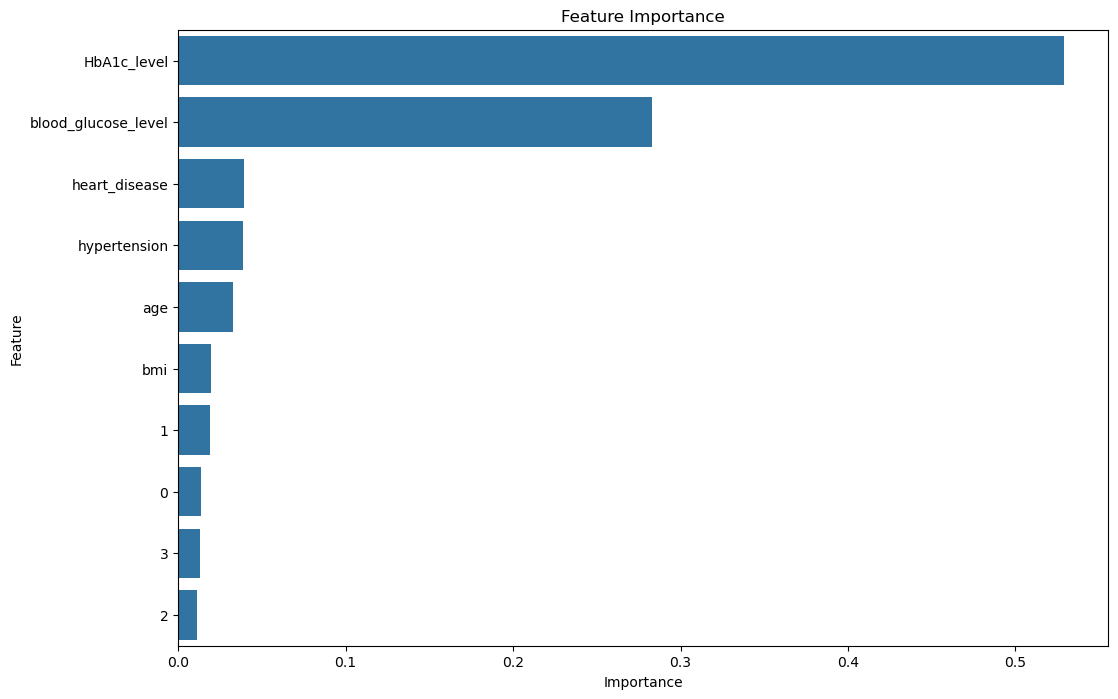

In [79]:
# Fit the model with the best parameters (if tuning has been done) or the default model
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_scaled, y_train)

# Extract feature importances
importances = best_model.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [82]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df 


,Feature,Importance
4,HbA1c_level,0.528907
5,blood_glucose_level,0.282803
2,heart_disease,0.039457
1,hypertension,0.038872
0,age,0.032854
3,bmi,0.019731
7,1,0.019044
6,0,0.013837
9,3,0.013004
8,2,0.011492


#### Observation
From this table, we can see that **HbA1c_level** and **blood_glucose_level** are the most important features for predicting the likelihood of diabetes onset. These features should be a primary focus for targeted preventive measures.

## Final Conclusion:
The **XGBoost** model emerged as the best-performing model for predicting the likelihood of diabetes onset, with **high precision**, **recall**, and **F1 score**. Key features identified include **HbA1c_level** and **blood_glucose_level**, which are crucial for targeted preventive measures. **Prioritizing recall** ensures most at-risk individuals are identified, enabling timely interventions, while balancing with precision minimizes unnecessary interventions.